<a href="https://colab.research.google.com/github/feniltailor22/Deep_Learning/blob/main/Transfer_Learning_Plant_Diseases_identification_using_Inception_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#In the given dataset we have Tomato leaf image dataset having 10 categories.
#We have 10 types of tometo leaves.
#We have approx 1900 Images in each class of Training data and 500 Images in Testing data.
#Here we will identify the type of Tomato Plant Diseases with the help of available Training Tomato Leaf Images using VGG 16 Transfer Learning.   

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
#Steps to load a dataset from kaggle

In [ ]:
#1. Install the Kaggle library

! pip install kaggle

In [ ]:
#2. Make a directory named “.kaggle”

! mkdir ~/.kaggle

In [ ]:
#3. Copy the “kaggle.json” into this new directory

! cp kaggle.json ~/.kaggle/

In [ ]:
#4. Allocate the required permission for this file.

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Downloading Competitions dataset:
# Copy API Command 

! kaggle datasets download -d noulam/tomato

100% 741M/743M [00:14<00:00, 40.5MB/s]
100% 743M/743M [00:14<00:00, 52.7MB/s]


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

In [ ]:
Train_path= '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/'
Test_path= '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/'

In [ ]:
# re-size all the images to 224*224 because VGG 16 has 224*224 input layer architecture
IMAGE_SIZE = [224, 224]

In [ ]:
# add preprocessing layer to the front of Inception V3
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#[3] in IMAGE_SIZE + [3] stands for image channels
#include_top= False means dropping the output layer of Inception V3.
#because Inception V3 has 1000 categories in output layer and we only classify data according to the requirement.

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights of VGG 16 because it is already trained weights.
for layer in inception.layers:
  layer.trainable = False

In [ ]:
#getting the number of classes available in Training Data
folders= glob('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/*')

In [ ]:
folders

['/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/new plant

In [ ]:
#Flattening the last layer of Inception V3
x = Flatten()(inception.output)

In [ ]:
#Creating the last output layer (which is dense) = len(folders) = 10 here.
predictions= Dense(len(folders), activation='softmax')(x)

In [ ]:
#creating a model
model= Model(inputs=inception.input, outputs=predictions)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen= ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
test_datagen= ImageDataGenerator(rescale=1./255)

In [ ]:
training_set= train_datagen.flow_from_directory(
    directory='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/',
    target_size=(224,224),
    batch_size=16,
    class_mode= 'categorical'
)

Found 18345 images belonging to 10 classes.


#flow_from_directory parameters 
directory: The path to the folder that contains all the images.  
x_col: The column name in the DataFrame that has the image names.  
y_col: The column name in the DataFrame that has the target values.  
class_mode: Set to binary is for 1-D binary labels whereas categorical is for 2-D one-hot encoded labels.  
target_size: Size of input images.  
batch_size: Size of the batches of data.  
seed: Set to reproduce the result.

In [ ]:
testing_set= test_datagen.flow_from_directory(
    directory='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/',
    target_size=(224,224),
    batch_size=16,
    class_mode= 'categorical'
)

Found 4585 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
earlystop= EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
#fit the model
results= model.fit(
    x=training_set, 
    validation_data=testing_set, 
    batch_size=16,
    epochs=10,
    verbose=True,
    callbacks=earlystop,
    shuffle=True
    )

Epoch 1/10
1147/1147 [==============================] - 305s 266ms/step - loss: 2.9371 - accuracy: 0.8658 - val_loss: 5.1735 - val_accuracy: 0.7939
Epoch 2/10
1147/1147 [==============================] - 301s 262ms/step - loss: 2.8642 - accuracy: 0.8707 - val_loss: 3.2565 - val_accuracy: 0.8632
Epoch 3/10
1147/1147 [==============================] - 299s 261ms/step - loss: 2.9369 - accuracy: 0.8752 - val_loss: 3.2573 - val_accuracy: 0.8576
Epoch 4/10
1147/1147 [==============================] - 292s 254ms/step - loss: 2.6921 - accuracy: 0.8856 - val_loss: 3.1485 - val_accuracy: 0.8709
Epoch 5/10
1147/1147 [==============================] - 291s 253ms/step - loss: 2.3363 - accuracy: 0.8968 - val_loss: 3.6928 - val_accuracy: 0.8576
Epoch 6/10
1147/1147 [==============================] - 291s 253ms/step - loss: 2.4832 - accuracy: 0.8947 - val_loss: 4.1562 - val_accuracy: 0.8567
Epoch 7/10
1147/1147 [==============================] - 290s 252ms/step - loss: 2.3514 - accuracy: 0.9013 - val_

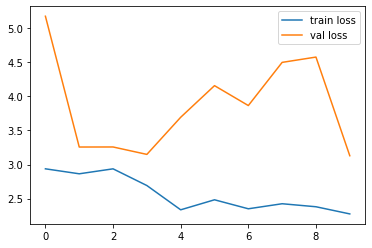

In [ ]:
# loss
plt.plot(results.history['loss'], label='train loss')
plt.plot(results.history['val_loss'], label='val loss')
plt.legend()
plt.show()

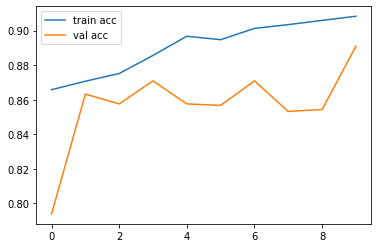

In [ ]:
# accuracies
plt.plot(results.history['accuracy'], label='train acc')
plt.plot(results.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()